## Dataset Background

This dataset, "PSID.csv", originates from the Panel Study of Income Dynamics (PSID), a longitudinal household survey conducted in the United States. It captures information such as education level, income, hours worked, age, marital status, and number of children, primarily used for socio-economic and labor market research.

### Variable Descriptions:
- `educatn` (Numerical): Years of education completed.
- `earnings` (Numerical): Total earnings in a year (USD).
- `hours` (Numerical): Total hours worked per week.
- `age` (Numerical): Age in years.
- `marital` (Categorical): Marital status (e.g., married, single, separated).
- `kids` (Numerical): Number of children in the household.


In [1]:
import pandas as pd
# Loading the dataset
df = pd.read_csv('/Users/sumasrijasti/Downloads/PSID.csv')
# Viewing the first few rows
df.head()

,rownames,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4856 non-null   int64  
 1   intnum    4856 non-null   int64  
 2   persnum   4856 non-null   int64  
 3   age       4856 non-null   int64  
 4   educatn   4855 non-null   float64
 5   earnings  4856 non-null   int64  
 6   hours     4856 non-null   int64  
 7   kids      4856 non-null   int64  
 8   married   4856 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 341.6+ KB


In [3]:
# Summary statistics for numeric columns
print(df.describe())

          rownames       intnum      persnum          age      educatn  \
count  4856.000000  4856.000000  4856.000000  4856.000000  4855.000000   
mean   2428.500000  4598.101318    59.213550    38.462932    16.377137   
std    1401.950784  2761.971174    79.748556     5.595116    18.449502   
min       1.000000     4.000000     1.000000    30.000000     0.000000   
25%    1214.750000  1905.000000     2.000000    34.000000    12.000000   
50%    2428.500000  5464.000000     4.000000    38.000000    12.000000   
75%    3642.250000  6655.000000   170.000000    43.000000    14.000000   
max    4856.000000  9306.000000   205.000000    50.000000    99.000000   

            earnings        hours         kids  
count    4856.000000  4856.000000  4856.000000  
mean    14244.506178  1235.334843     4.481260  
std     15985.447449   947.175837    14.887856  
min         0.000000     0.000000     0.000000  
25%        85.000000    32.000000     1.000000  
50%     11000.000000  1517.000000     2

In [4]:
# Check for missing values
print(df.isnull().sum())

rownames    0
intnum      0
persnum     0
age         0
educatn     1
earnings    0
hours       0
kids        0
married     0
dtype: int64


# DATA CLEANING

In [5]:
df = df.rename(columns={
    'educatn': 'education',
    'earnings': 'income',
    'hours': 'hours_worked',
    'kids': 'children',
    'married': 'marital_status'
})

In [6]:
# 1. Remove unrealistic education values
df = df[df['education'] <= 30]

# 2. Remove rows where income is zero or negative
df = df[df['income'] > 0]

# 3. Remove rows where hours worked is zero or negative
df = df[df['hours_worked'] > 0]

# 4. Remove unrealistic number of children
df = df[df['children'] <= 15]

# 5. Convert marital status to category
df['marital_status'] = df['marital_status'].astype('category')

# 6. Confirm cleaning results
print(df.describe())
print(df['marital_status'].value_counts())

          rownames       intnum      persnum          age    education  \
count  3459.000000  3459.000000  3459.000000  3459.000000  3459.000000   
mean   2274.803411  4291.284186    60.175195    38.495519    12.895635   
std    1368.325326  2716.425501    79.834531     5.443455     2.503169   
min       1.000000     4.000000     1.000000    30.000000     0.000000   
25%    1089.500000  1722.500000     2.000000    34.000000    12.000000   
50%    2218.000000  5234.000000     5.000000    38.000000    12.000000   
75%    3411.500000  6412.500000   170.000000    43.000000    14.000000   
max    4856.000000  9306.000000   199.000000    50.000000    17.000000   

              income  hours_worked     children  
count    3459.000000   3459.000000  3459.000000  
mean    18964.558832   1633.455912     2.013877  
std     15895.935863    720.928025     1.334177  
min        13.000000      6.000000     0.000000  
25%      8000.000000   1213.000000     1.000000  
50%     16000.000000   1856.00000

In [7]:
# Remove rows where marital_status is 'NA/DF'
df = df[df['marital_status'] != 'NA/DF']

# Confirm cleanup
print(df['marital_status'].value_counts())


marital_status
married          2294
divorced          476
never married     428
separated         202
widowed            54
NA/DF               0
Name: count, dtype: int64


In [8]:
# Remove 'NA/DF' from the list of category labels
df['marital_status'] = df['marital_status'].cat.remove_unused_categories()

# Check again
print(df['marital_status'].cat.categories)


Index(['divorced', 'married', 'never married', 'separated', 'widowed'], dtype='object')


In [9]:
print("Final row count:", len(df))


Final row count: 3454


In [10]:
print(df['marital_status'].unique())


['married', 'divorced', 'never married', 'widowed', 'separated']
Categories (5, object): ['divorced', 'married', 'never married', 'separated', 'widowed']


In [11]:
print(df['education'].describe())


count    3454.000000
mean       12.894325
std         2.503772
min         0.000000
25%        12.000000
50%        12.000000
75%        14.000000
max        17.000000
Name: education, dtype: float64


In [12]:
print(df[['income', 'hours_worked']].min())


income          13
hours_worked     6
dtype: int64


In [13]:
print(df['children'].max())


10


In [14]:
print(df.columns.tolist())


['rownames', 'intnum', 'persnum', 'age', 'education', 'income', 'hours_worked', 'children', 'marital_status']


# Feature Engineering

In [15]:
import numpy as np

# Hourly wage = income / hours worked
df['wage'] = df['income'] / df['hours_worked']

# Log-transformed income for regression (if needed later)
df['log_income'] = np.log1p(df['income'])  # log(1 + income)


In [16]:
df['age_squared'] = df['age'] ** 2

In [17]:
print(df.columns.tolist())


['rownames', 'intnum', 'persnum', 'age', 'education', 'income', 'hours_worked', 'children', 'marital_status', 'wage', 'log_income', 'age_squared']


In [18]:
print(df.columns)
print(df.head())


Index(['rownames', 'intnum', 'persnum', 'age', 'education', 'income',
       'hours_worked', 'children', 'marital_status', 'wage', 'log_income',
       'age_squared'],
      dtype='object')
   rownames  intnum  persnum  age  education  income  hours_worked  children  \
0         1       4        4   39       12.0   77250          2940         2   
1         2       4        6   35       12.0   12000          2040         2   
2         3       4        7   33       12.0    8000           693         1   
3         4       4      173   39       10.0   15000          1904         2   
4         5       5        2   47        9.0    6500          1683         5   

  marital_status       wage  log_income  age_squared  
0        married  26.275510   11.254815         1521  
1       divorced   5.882353    9.392745         1225  
2        married  11.544012    8.987322         1089  
3        married   7.878151    9.615872         1521  
4        married   3.862151    8.779711         2209  

# EDA

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


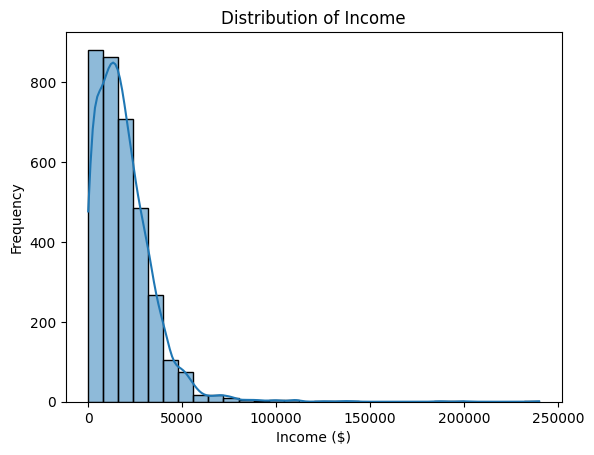

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['income'], bins=30, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.show()


/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


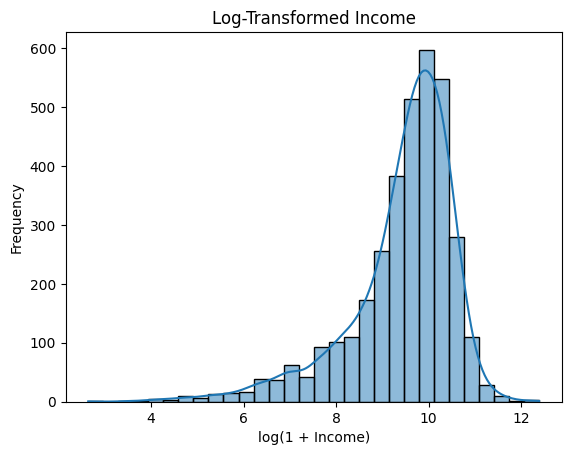

In [20]:
sns.histplot(df['log_income'], bins=30, kde=True)
plt.title("Log-Transformed Income")
plt.xlabel("log(1 + Income)")
plt.ylabel("Frequency")
plt.show()

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


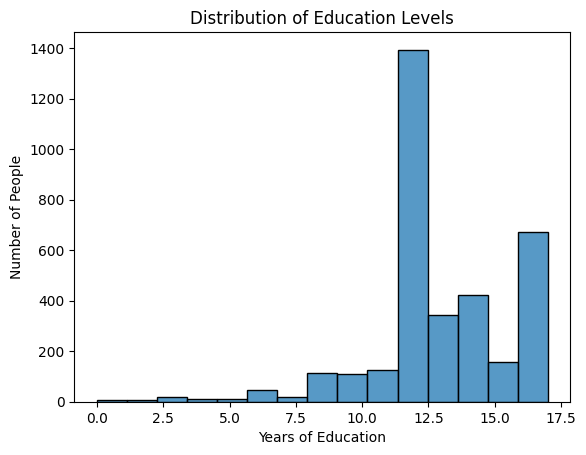

In [21]:
sns.histplot(df['education'], bins=15, kde=False)
plt.title("Distribution of Education Levels")
plt.xlabel("Years of Education")
plt.ylabel("Number of People")
plt.show()

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


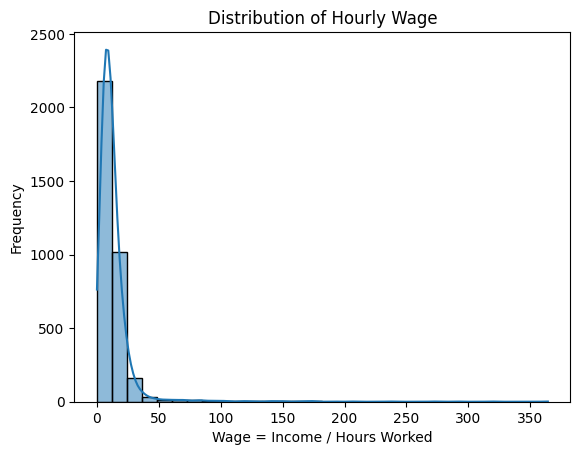

In [22]:
sns.histplot(df['wage'], bins=30, kde=True)
plt.title("Distribution of Hourly Wage")
plt.xlabel("Wage = Income / Hours Worked")
plt.ylabel("Frequency")
plt.show()

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


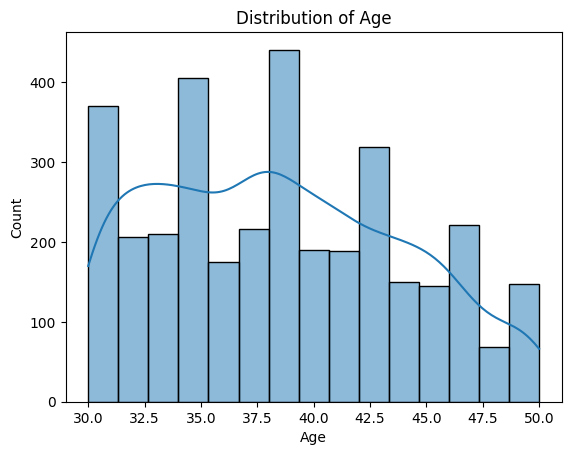

In [23]:
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


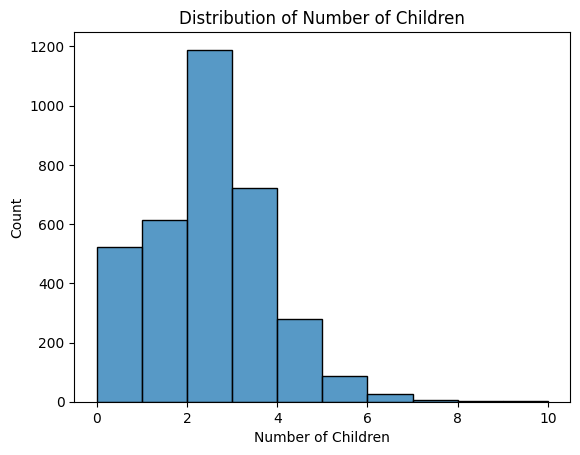

In [24]:
sns.histplot(df['children'], bins=10, kde=False)
plt.title("Distribution of Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

# Education vs Income (Boxplot)

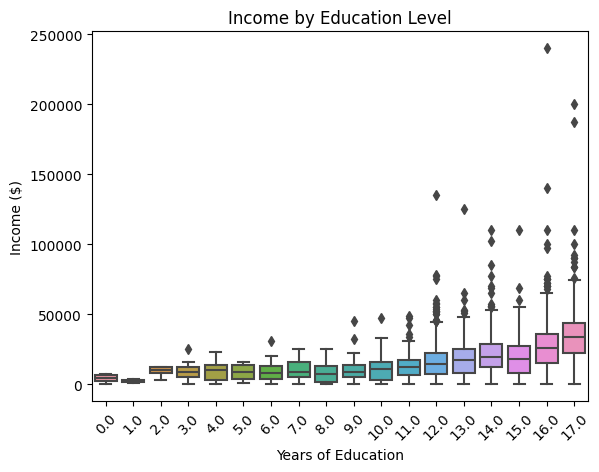

In [25]:
sns.boxplot(x='education', y='income', data=df)
plt.title("Income by Education Level")
plt.xlabel("Years of Education")
plt.ylabel("Income ($)")
plt.xticks(rotation=45)
plt.show()


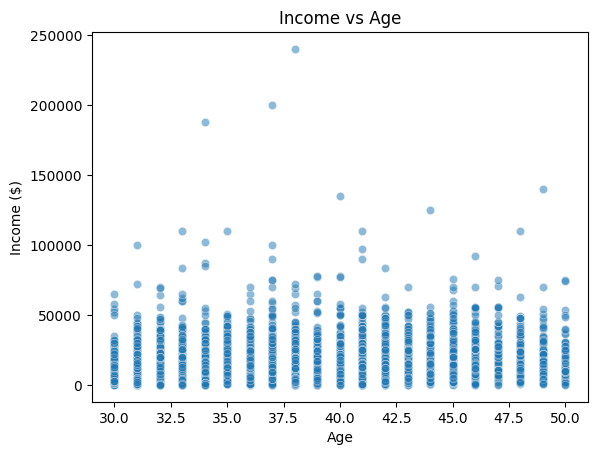

In [26]:
sns.scatterplot(x='age', y='income', data=df, alpha=0.5)
plt.title("Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.show()


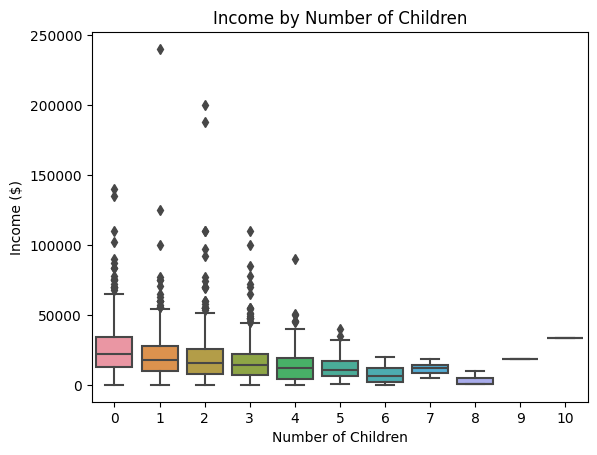

In [27]:
sns.boxplot(x='children', y='income', data=df)
plt.title("Income by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Income ($)")
plt.show()


In [28]:
def reconstruct_marital_status(row):
    if row['marital_status_married'] == 1:
        return 'married'
    elif row['marital_status_never married'] == 1:
        return 'never married'
    elif row['marital_status_separated'] == 1:
        return 'separated'
    elif row['marital_status_widowed'] == 1:
        return 'widowed'
    else:
        return 'divorced'  # base category dropped during one-hot encoding

# Create marital_status column again
df['marital_status'] = df.apply(reconstruct_marital_status, axis=1)


KeyError: 'marital_status_married'

/Users/sumasrijasti/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


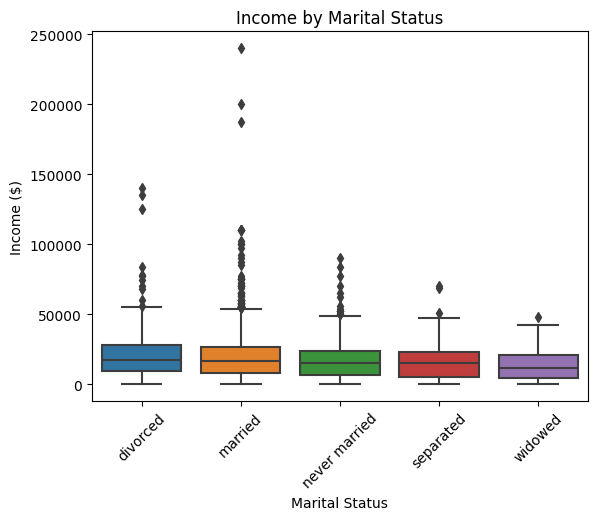

In [29]:
sns.boxplot(x='marital_status', y='income', data=df)
plt.title("Income by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Income ($)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Print the correlation matrix as a clean table
print("Correlation Matrix:")
display(corr_matrix.round(2))  # if using Jupyter Notebook
# or just:
# print(corr_matrix.round(2))  # if not using Jupyter


Correlation Matrix:


NameError: name 'corr_matrix' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Matrix with Manual Annotations", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add values manually
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        value = corr_matrix.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Step 1: Define y
y = df['log_income']

# Step 2: Select the correct feature columns (already one-hot encoded)
feature_cols = [
    'education',
    'age',
    'age_squared',
    'hours_worked',
    'children',
    'marital_status_married',
    'marital_status_never married',
    'marital_status_separated',
    'marital_status_widowed'
]

# Step 3: Build X
X = df[feature_cols].copy()

# Step 4: Force all to numeric (including booleans and categories)
X = X.astype(float)

# Step 5: Add constant for intercept
X = sm.add_constant(X)

# Step 6: Align y
y = y.loc[X.index]

# Step 7: Fit the model
model = sm.OLS(y, X).fit()

# Step 8: Show summary
print(model.summary())


In [ ]:
import numpy as np

# Log-transform 'earnings' (handles zero or negative values safely)
df_encoded['log_earnings'] = np.log1p(df_encoded['earnings'])

## Final Summary

The dataset reveals that education and hours worked are positively associated with earnings, though with considerable variance. Marital status influences both earnings and number of children, with married individuals tending to be older, more educated, and earn more. Age also correlates with earnings and hours, hinting at labor market trends. Overall, the data underscores how multiple demographic and work-related variables interact to shape income levels.


In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Step 1: Drop missing values
# df_clean = df.dropna(subset=['earnings', 'educatn', 'age', 'kids', 'married'])

# # Step 2: Convert 'married' to categorical
# df_clean['married'] = df_clean['married'].astype('category')

# # Step 3: One-hot encode 'married'
# df_encoded = pd.get_dummies(df_clean, drop_first=True)

# # Step 4: Define independent and dependent variables
# X_cols = ['educatn', 'age', 'kids'] + [col for col in df_encoded.columns if 'married_' in col]
# X = df_encoded[X_cols]
# y = np.log1p(df_encoded['earnings'])
# # Step 5: Add constant (intercept)
# X = sm.add_constant(X)

# # Step 6: Convert boolean columns to int
# bool_cols = X.select_dtypes(include='bool').columns
# X[bool_cols] = X[bool_cols].astype(int)

# # Step 7: Ensure all is numeric
# X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')

# # Step 8: Drop rows with NaNs
# X = X.dropna()
# y = y.loc[X.index]

# # Step 9: Run the regression
# model = sm.OLS(y, X).fit()

# # Step 10: Display summary
# print(model.summary()) 



In [ ]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm

# # Step 1: Drop missing values
# df_clean = df.dropna(subset=['earnings', 'educatn', 'age', 'kids', 'married'])

# # Step 2: Convert 'married' to categorical
# df_clean['married'] = df_clean['married'].astype('category')

# # Step 3: One-hot encode 'married'
# df_encoded = pd.get_dummies(df_clean, drop_first=True)

# # Step 4: Create log-transformed earnings
# df_encoded['log_earnings'] = np.log1p(df_encoded['earnings'])  # log1p handles zeros safely

# # Step 5: Define independent and dependent variables
# X_cols = ['educatn', 'age', 'kids'] + [col for col in df_encoded.columns if 'married_' in col]
# X = df_encoded[X_cols]
# y = df_encoded['log_earnings']

# # Step 6: Add constant (intercept)
# X = sm.add_constant(X)

# # Step 7: Convert boolean columns to int (if any)
# bool_cols = X.select_dtypes(include='bool').columns
# X[bool_cols] = X[bool_cols].astype(int)

# # Step 8: Ensure all columns are numeric
# X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')

# # Step 9: Drop any remaining NaNs
# X = X.dropna()
# y = y.loc[X.index]

# # Step 10: Run the regression
# model = sm.OLS(y, X).fit()

# # Step 11: Display summary
# print(model.summary())


In [ ]:
# Assuming you've already fitted your model:
# model = sm.OLS(y, X).fit()

# Print 95% confidence intervals for each coefficient
conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ['Lower 95%', 'Upper 95%']
print(conf_int)

